# PCA 요약
	• 공분산 행렬을 구한다. --> 데이터가 퍼진 정도와 방향대로 
	• 공분산 행렬을 고유분해해서 고유 벡터를 도출한다. 
	• 데이터에서 평균을 빼서 균형을 맞춘 후 고유 벡터를 순차적으로 내적한다. 
	• 고유벡터에 projection된 결과가 차원축소된 결과이다.  

# PCA 진행 과정
	• 열은 각 feature (국어, 영어, 수학점수), 행은 각 데이터 (철수,영희)라고 할때 = X
	• 공분산 행렬을 구한다. 이 공분산 행렬은 선형변환 매트릭스(A) 처럼 작용할 것이다. 
		○ X를 각 열별 평균값으로 나누어서, 중앙을 원점으로 옮겨준다. 
		○ XtX 를 곱한 후, 데이터수 1/n를 곱한다. 
		○ 그 결과, 대각선은 각 열이 퍼진 정도를 나타낸다. 
		○ 그 결과, 대각선 뺀 나머지는 서로 다른 열의 상관관계 (함께 변하는 정도) 를 나타낸다. 
	• 공분산 행렬을 고윳값 분해를 하면 -> 공분산 행렬의 고유벡터가 나올 것이다.
		○ 고유벡터는 공분산 행렬로 선형변환을 해도, 길이만 변할 뿐 방향은 변하지 않는다. 
		○ 이 고유벡터는 차원 축소시 새로운 축으로 작용하게 된다. 
	• 원래의 데이터에 열별 평균을 뺀다.
	• 그 데이터에 고유벡터를 곱해서 projection을 하면, 차원 축소를 할 수 있다. 
		○ 고유벡터는 원래의 열 개수만큼 나오기 때문에, 가장 우선순위가 높은 고유벡터부터 원하는 차원 수만큼 projection한다. 


# 공분산 행렬 상세 설명
	• 그 데이터가 퍼진 방향을 설명해주는 행렬이다. 
	• 만약 데이터에 공분산 행렬을 곱해주면 선형 변환이 되며
	• 가장 잘 설명해주는 방향으로 잡아 당기게 된다.  

# 고유벡터 상세 설명
	• 선형변환 행렬을 고유분해하면 -> VΛV-1
	• 선형변환을 다음과 같이 3단계로 나눠준다 = V는 기존 벡터의 길이를 유지하면서 회전시킴 -> 람다는 벡터의 길이만 바꿔줌 -> V역행렬은 다시 원래 위치로 회전시킴
	• V를 구성하는 작은 v들은 새로운 변환을 가장 잘 설명해주는 새로운 축들을 의미한다
	
# Projection 상세 설명
	• Projection 전에 열별 평균 값을 빼서 원점에 중심을 맞춰준다. 
	• 고유벡터를 곱해서 projection을 하게 되면, 고유벡터의 방향대로 사영되며, 고유벡터별 좌표값이 도출된다. 

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('axes',unicode_minus=False)



# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#데이터 생성

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)


# 출처: https://excelsior-cjh.tistory.com/167 [EXCELSIOR]

X.shape: (60, 3)


In [32]:
# 고유값 분해

X_cen = X - X.mean(axis=0)  # 평균을 0으로 정규화
X_cov = np.dot(X_cen.T, X_cen) / 59 #공분산 행렬을 계산한다. 
print('X_cov :', X_cov)

w, v = np.linalg.eig(X_cov)

print('\neigenvalue = pca.explained_variance:', w) #람다값들
print('\neigenvector = pca.components.T:\n', v) #고유벡터들 =  pca.components.T와 일치한다. 
print('\nexplained variance ratio :', w / w.sum()) 

X_cov : [[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]

eigenvalue = pca.explained_variance: [0.77830975 0.1351726  0.01034272]

eigenvector = pca.components.T:
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [42]:
#실제 pca를 할 경우

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# pca.fit(X)
printcipalComponents = pca.fit_transform(X)

_X=X-X.mean(axis=0)

print('원래 데이터 모양',X.shape)

print('\nsingular value :', pca.singular_values_)
print('\nsingular vector=pca.components_.T :\n', pca.components_.T)

# PC1에 projection
pc1 = v[:, 0]
print('\n첫번째 고유벡터',pc1)
proj1 = np.dot(_X, pc1)
print('\n첫번째 projection',proj1.shape,proj1)
 
# ​# PC2에 projection 
pc2 = v[:, 1]
proj2 = np.dot(_X, pc2)
print('\n두번째 projection',proj1.shape,proj2)

# ​# PC3에 projection
pc3 = v[:, 2]
proj3 = np.dot(_X, pc3)
print('\n세번째 projection',proj1.shape,proj3)


proj_list = np.array([proj1.var(), proj2.var(), proj3.var()])

print('\nvariance(==eigenvalue) :', proj_list)
print('\nexplained variance ratio :', proj_list / proj_list.sum())

원래 데이터 모양 (60, 3)

singular value : [6.77645005 2.82403671 0.78116597]

singular vector=pca.components_.T :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]

첫번째 고유벡터 [0.93636116 0.29854881 0.18465208]

첫번째 projection (60,) [-1.26203346  0.08001485 -1.17545763 -0.89305601 -0.73016287  1.10436914
 -1.27265808  0.44933007  1.09356195  0.66177325 -1.04466138  1.05932502
 -1.13761426 -1.16044117  1.00167625 -0.2750406   0.45624787  0.79706574
  0.66924929 -1.30679728  0.6626586  -1.25387588 -1.04046987 -1.26047729
  1.09786649  0.7130973  -0.17786909  1.02975735 -0.94552283  0.80994916
  0.20189175 -1.34219411  0.13599883  0.8206931   0.90818634  0.06703671
  0.13936893 -0.37356775  0.7312441  -0.5230355   0.86146183 -0.33203239
 -0.99467436  1.04520043  0.87477048  0.30457923 -0.63685997  1.1287259
  0.03836205 -0.41386843 -1.32417938  0.92968677 -0.40274964  1.11480941
  0.31915065  1.02666316 -1.24145806  0.66770361 -

In [43]:
#데이터 생성

X=np.array([[6,3],[2,4],[4,2]])

print('X.shape:', X.shape)


# 출처: https://excelsior-cjh.tistory.com/167 [EXCELSIOR]

X.shape: (3, 2)


In [44]:
# 고유값 분해

X_cen = X - X.mean(axis=0)  # 평균을 0으로 정규화
X_cov = np.dot(X_cen.T, X_cen) / 59 #공분산 행렬을 계산한다. 
print('X_cov :', X_cov)

w, v = np.linalg.eig(X_cov)

print('\neigenvalue = pca.explained_variance:', w) #람다값들
print('\neigenvector = pca.components.T:\n', v) #고유벡터들 =  pca.components.T와 일치한다. 
print('\nexplained variance ratio :', w / w.sum()) 

X_cov : [[ 0.13559322 -0.03389831]
 [-0.03389831  0.03389831]]

eigenvalue = pca.explained_variance: [0.1458568  0.02363472]

eigenvector = pca.components.T:
 [[ 0.95709203  0.28978415]
 [-0.28978415  0.95709203]]

explained variance ratio : [0.86055513 0.13944487]


In [49]:
#실제 pca를 할 경우

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
# pca.fit(X)
printcipalComponents = pca.fit_transform(X)

_X=X-X.mean(axis=0)

print('원래 데이터 모양',X.shape)

print('\nsingular value :', pca.singular_values_)
print('\nsingular vector=pca.components_.T :\n', pca.components_.T)

# PC1에 projection
pc1 = v[:, 0]
print('\n첫번째 고유벡터',pc1)
proj1 = np.dot(_X, pc1)
print('\n첫번째 projection',proj1.shape,proj1)

printcipalComponents

원래 데이터 모양 (3, 2)

singular value : [2.93352199]

singular vector=pca.components_.T :
 [[-0.95709203]
 [ 0.28978415]]

첫번째 고유벡터 [ 0.95709203 -0.28978415]

첫번째 projection (3,) [ 1.91418405 -2.2039682   0.28978415]


array([[-1.91418405],
       [ 2.2039682 ],
       [-0.28978415]])

In [50]:
#Appendix: svd

U, D, V_t = np.linalg.svd(X_cen)
print('singular value :', D)
print('\nsingular vector :\n', V_t.T)
print('\nexplained variance ratio :', D ** 2 / np.sum(D**2))


singular value : [2.93352199 1.18086778]

singular vector :
 [[-0.95709203 -0.28978415]
 [ 0.28978415 -0.95709203]]

explained variance ratio : [0.86055513 0.13944487]


# 그림그리기

0.7625315008826112 [-0.94446029 -0.32862557]
[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
0.018477895513562572 [-0.32862557  0.94446029]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]


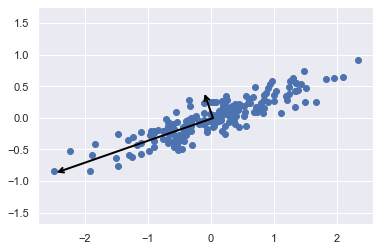

In [18]:


#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

variance=pca.explained_variance_
components=pca.components_

for length, vector in zip(variance,components): #variance=length=1*2, components=vector=2*2
    print(length, vector)
    v = 3* vector * np.sqrt(length) 
    print(pca.mean_, pca.mean_ + v)#중간점->중간+vector를 연결
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

그림 저장 pca_best_projection_plot


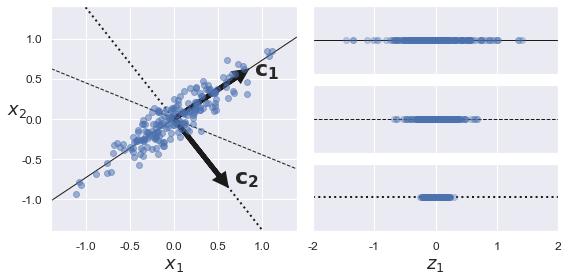

In [46]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()